## Graphs

In [11]:
from lolviz import *

In [25]:
class GraphNode:
    
    def __init__(self,val):
        self.val=val
        self.edges=[]
    
    def add(self,target):
        self.edges.append(target)
        
    def __repr__(self):
        return str(self.val)

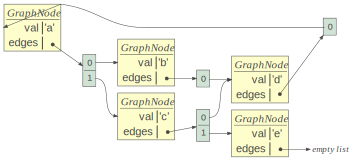

In [206]:
a=GraphNode('a')
b=GraphNode('b')
c=GraphNode('c')
d=GraphNode('d')
e=GraphNode('e')

a.add(b)
a.add(c)
b.add(d)
c.add(d)
d.add(a)
c.add(e)
objviz(a)


### walking graphs

In [15]:
def walk(node):
    if node is None: return
    print(node.val)
    for edge in node.edges:
        walk(edge)

In [16]:
walk(a)

a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b
d
a
b


RecursionError: maximum recursion depth exceeded while calling a Python object

There was a cycle hence we see the output as below, a never ending loop

### deal with cycles

In [17]:
def walk_cycle(start,visited):
    if start is None: return 
    if start in visited: return 
    print(start.val)
    visited.add(start)
    for edge in start.edges:
        walk_cycle(edge,visited)

In [27]:
walk_cycle(a,set())

a
b
d
c


### detect cycles

In [20]:
def detect_cycle(start,visited):
    if start is None: return False
    if start in visited: return True
    visited.add(start)
    for edge in start.edges:
        b = detect_cycle(edge,visited)
        if b: return True
    return False

In [22]:
detect_cycle(a,set())

True

### reachable nodes 

In [28]:
def reach(p):
    reach_nodes=set()
    reachable(p,reach_nodes,set())
    return reach_nodes

def reachable(p,reach_nodes,visited):
    
    if p in visited: return
    visited.add(p)
    for edge in p.edges:
        reach_nodes.add(edge)
        reachable(edge,reach_nodes,visited)
    

In [34]:
reach(d)

{a, b, c, d}

### detect cycle leading to start node

In [35]:
def iscyclic(p):
    return detectCycle(p,p,set())

def detectCycle(start,p,visited):
    if p is None: return False
    if p in visited:
        if p is start: return True
        else: return False
    visited.add(p)
    for edge in p.edges:
        b = detectCycle(start,edge,visited)
        if b: return True
    return False

In [36]:
iscyclic(a)

True

### Path from source to target

In [101]:
def get_path(p,q):
    path = [p]
    return walk(p,q,set(),path)
    
def walk(p,q,visited,path):
    if p is None: return None
    if p is q: return path
    if p in visited: return 
    visited.add(p)
    for edge in p.edges:
        pat = walk(edge,q,visited,path+[edge])
        if pat is not None: return pat
    return None

In [102]:
get_path(a,d)

[a, b, d]

In [103]:
get_path(d,c)

[d, a, c]

### All possible paths from source to target

In [107]:
def all_paths(p,q):
    allPaths=[]
    walk(p,q,set(),[p],allPaths)
    return allPaths
    
def walk(p,q,visited,path,allPaths):
    if p is None: return None
    if p is q: 
        allPaths.append(path)
        return 
    if p in visited: return
    visited.add(p)
    for edge in p.edges:
        walk(edge,q,visited,path+[edge],allPaths)


In [108]:
all_paths(a,d)

[[a, b, d], [a, c, d]]

### Breadth first traversal

In [121]:
def bfs(p):
    if p is None: return
    visited = {p}
    worklist = [p]
    while len(worklist) > 0:
        print(worklist)
        cur = worklist.pop(0)
        for edge in cur.edges:
            if edge not in visited:
                worklist.append(edge)
                visited.add(edge)

In [122]:
bfs(a)

[a]
[b, c]
[c, d]
[d]


### Shortest path from source to target

In [171]:
#Using dictionary
def shortest(p,q):
    worklist = [{p:[p]}]
    visited = set()
    while len(worklist) > 0:
        cur,path = (worklist.pop(0)).popitem()
        if cur is q: return path
        if cur in visited: continue
        visited.add(cur)
        for edge in cur.edges:
            worklist.append({edge:path+[edge]})
    return None

In [174]:
print(shortest(d,e))

[d, a, c, e]


In [179]:
#Using list
def shortest(p,q):
    worklist = [[p]]
    visited = set()
    while len(worklist) > 0:
        path = worklist.pop(0)
        cur = path[-1]
        if cur is q: return path
        if cur in visited: continue
        visited.add(cur)
        for edge in cur.edges:
            worklist.append(path+[edge])
    return None

In [182]:
shortest(d,e)

[d, a, c, e]

### Nodes reachable from source along with depth

In [217]:
def reach(p):
    visited = set()
    depth = 0
    reaches = {}
    reachable(p,depth,visited,reaches)
    print(reaches)
    return reaches

def reachable(p,depth,visited,reaches):
    if p is None: return 
    if p in visited: return 
    visited.add(p)
    
    for edge in p.edges:
        reaches[edge] = depth+1
        reachable(edge,depth+1,visited,reaches)

In [218]:
reach(a)

{b: 1, d: 2, a: 3, c: 1, e: 2}


{b: 1, d: 2, a: 3, c: 1, e: 2}

### Postorder traversal in graphs

In [229]:
def postorder(p,visited=set()):
    if p is None: return 
    if p in visited: return
    visited.add(p)
    for edge in p.edges:
        postorder(edge)
    print(p.val)

In [230]:
postorder(a)

d
b
e
c
a
